In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [2]:
print(data.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
print(data.isnull().sum())


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


The columns with missing values are Customer Lname (8 missing values), Customer Zipcode (3 missing values), Order Zipcode (155,679 missing values),Product Description (180,519 missing values) as these columns aren't that significant in our machine learning models we could consider dropping them.

In [5]:
print(data.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000 

In [6]:
data.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
data.drop(columns=['Customer Zipcode', 'Customer Lname'], inplace=True)


In [8]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


checking for outliers

In [9]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)


Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Department Id', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product Price',
       'Product Status'],
      dtype='object')


In [10]:
print(data[numerical_columns].describe())


       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000 

The key features for late delivery risk prediction will be
Days for shipping (real)
days for shipment (scheduled)
shipping mode
order region
order state
category name
customer segment
delivery status


#  EDA of dataset

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64


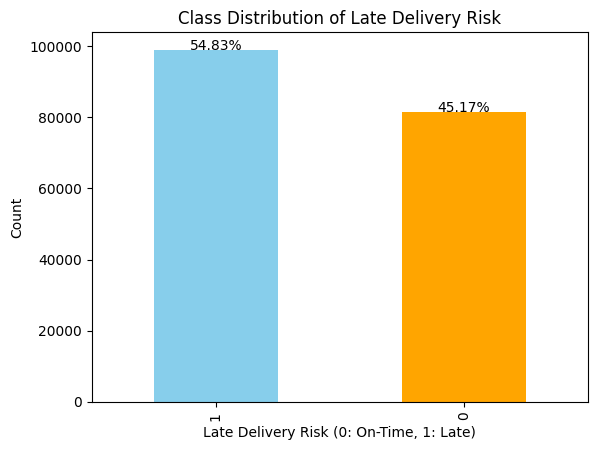

In [11]:
class_count = data['Late_delivery_risk'].value_counts()
class_percentage = (class_count / len(data)) * 100
print(class_count)

# Plot the distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bars = class_count.plot(kind='bar', color=['skyblue', 'orange'], ax=ax)
plt.title('Class Distribution of Late Delivery Risk')
plt.xlabel('Late Delivery Risk (0: On-Time, 1: Late)')
plt.ylabel('Count')

for bar, percentage in zip(bars.patches, class_percentage):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate (center of the bar)
        bar.get_height() + 100,  # Y coordinate (just above the bar)
        f'{percentage:.2f}%',  # Text to display
        ha='center',  # Center align the text
        fontsize=10,  # Font size
        color='black'  # Text color
    )

plt.show()


The dataset shows a slight imbalance, with more instances of late deliveries (Class 1 | 58.83%) compared to on-time deliveries (Class 0 | 45.17%).
However, the imbalance is not extreme (e.g., 80-20 or 90-10), and this can be handled without advanced rebalancing techniques. 

shipping mode analysis

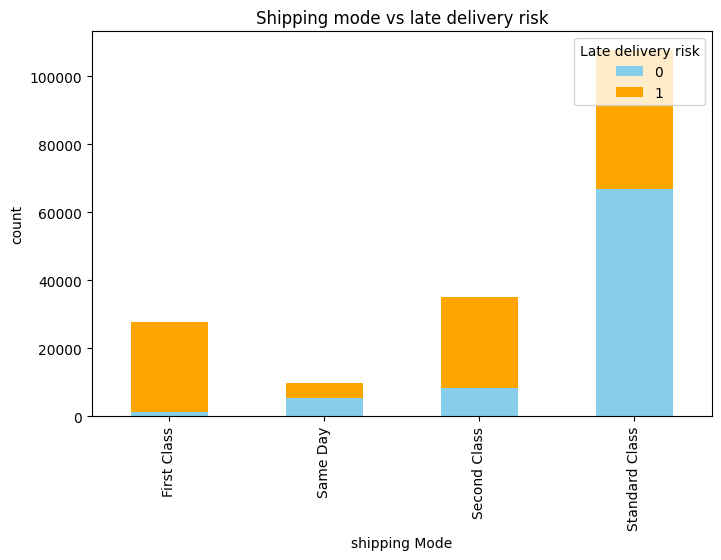

In [12]:
shipping_mode_analysis = data.groupby(['Shipping Mode', 'Late_delivery_risk']).size().unstack()
shipping_mode_analysis.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue', 'orange'])
plt.title("Shipping mode vs late delivery risk")
plt.xlabel("shipping Mode")
plt.ylabel("count")
plt.legend(title = 'Late delivery risk', loc='upper right')
plt.show()

The graph highlights that **Standard Class** shipping, while the most used, has a almost equal proportion for late and ontime deliveries, while the **First Class** and **Second Class** have a high proportion of late deliveries. In contrast, **Same Day** shipping has fewer orders but shows better reliability with fewer late deliveries. This indicates that shipping mode significantly impacts delivery performance, with Standard and First Class requiring improvements to reduce delays.

Regional analysis

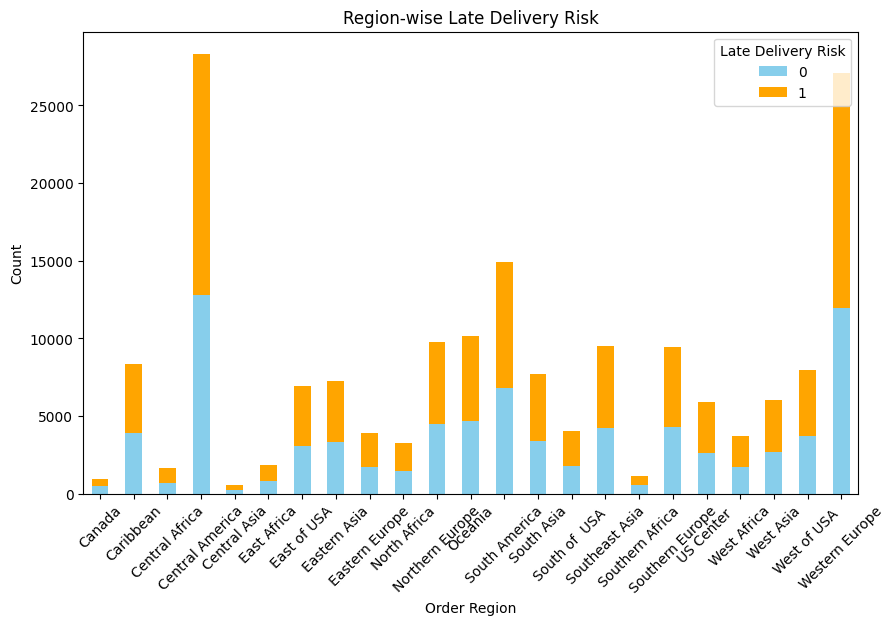

In [13]:
region_analysis = data.groupby(['Order Region', 'Late_delivery_risk']).size().unstack()
region_analysis.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Region-wise Late Delivery Risk')
plt.xlabel('Order Region')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.xticks(rotation=45)
plt.show()


The graph reveals that **Western Europe** and **Central America** have the highest order volumes, with a significant proportion of late deliveries. Other regions, such as **Southeast Asia** and **South America**, also show a notable count of late deliveries. Overall, late deliveries are prevalent across most regions, emphasizing the need for targeted logistical improvements, especially in high-order regions like Western Europe and Central America, to enhance delivery efficiency.

Nemerical Feature analysis

C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_22072\1691867656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x = 'Late_delivery_risk', y= 'Days for shipping (real)', palette='Set2')


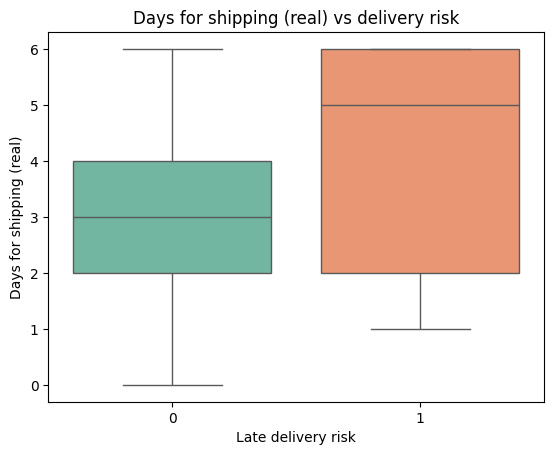

In [14]:
import seaborn as sns
sns.boxplot(data=data, x = 'Late_delivery_risk', y= 'Days for shipping (real)', palette='Set2')
plt.title('Days for shipping (real) vs delivery risk')
plt.xlabel('Late delivery risk')
plt.ylabel('Days for shipping (real)')
plt.show()

The graph reveals that orders flagged as having late delivery risk (1) generally take longer to ship, with a median shipping time of 5 days compared to 3 days for orders without late delivery risk (0). Additionally, the interquartile range (IQR) for orders with late delivery risk is wider, suggesting greater variability in shipping times. The upper whisker reaches its maximum at 6 days, showing that shipping delays are more pronounced when late delivery risk is present. In contrast, orders with no late delivery risk have a more compact IQR, with fewer extreme shipping delays. These findings highlight the strong correlation between extended shipping durations and the likelihood of late deliveries, emphasizing the need for predictive models to identify and mitigate such risks.

Days for shipment (scheduled) vs Late Delivery Risk

C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_22072\3817292372.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = "Late_delivery_risk", y = 'Days for shipment (scheduled)', palette="Set2")


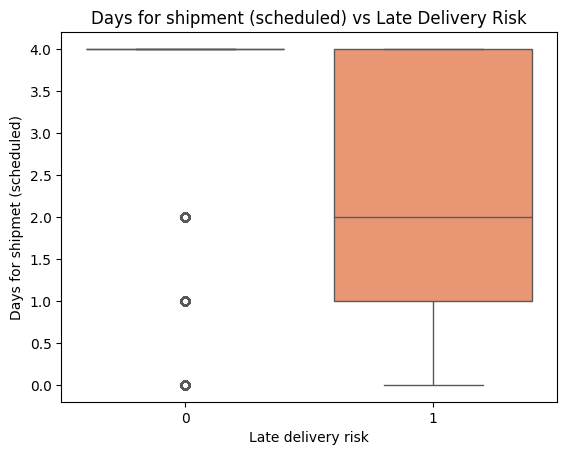

In [15]:
sns.boxplot(data = data, x = "Late_delivery_risk", y = 'Days for shipment (scheduled)', palette="Set2")
plt.title("Days for shipment (scheduled) vs Late Delivery Risk")
plt.xlabel("Late delivery risk")
plt.ylabel("Days for shipmet (scheduled)")
plt.show()

For orders with no late delivery risk (0), the scheduled shipping days are tightly clustered around 4 days, with minimal variability and a few outliers at 0, 1, and 2 days. In contrast, for orders with a late delivery risk (1), the scheduled shipping days display a broader distribution, ranging from 0 to 4 days, with a median around 2 days. The interquartile range (IQR) for late delivery risk orders is significantly wider, indicating greater variability in scheduled shipment times. This suggests that while the majority of orders without late delivery risk follow a consistent schedule, orders with late delivery risk tend to deviate more from the norm, which may contribute to the overall unpredictability and delays in shipping. The plot highlights the importance of understanding deviations in scheduled shipment times as a potential indicator of late delivery risk.

Category Analysis

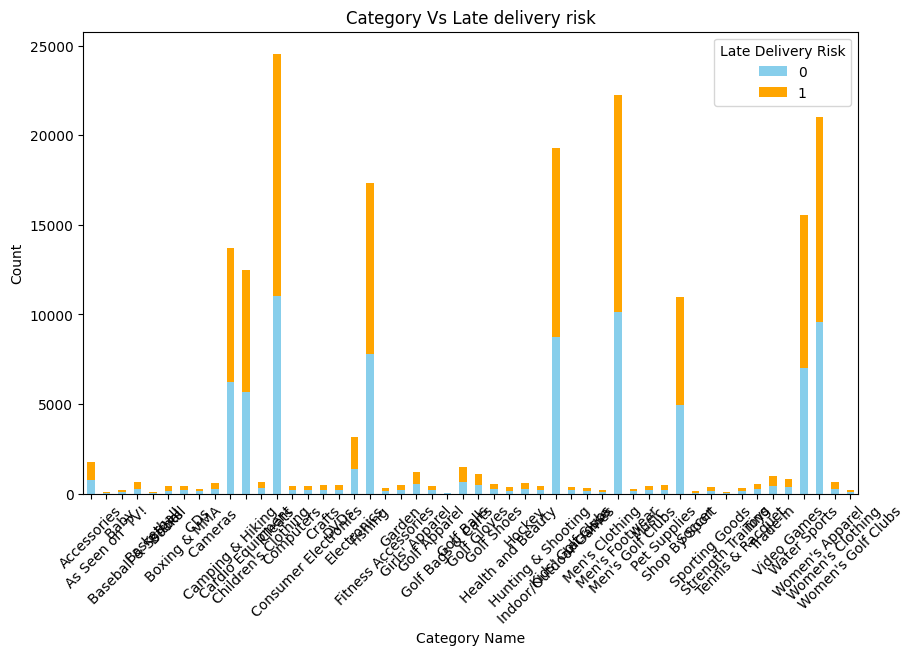

In [16]:
category_analysis = data.groupby(['Category Name', 'Late_delivery_risk']).size().unstack()
category_analysis.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'orange'])
plt.title('Category Vs Late delivery risk')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Categories like Consumer Electronics, Computers, Men's Clothing, Video Games, and Women's Apparel show the highest counts, with a significant proportion of deliveries falling under the late delivery risk (1). For instance, Consumer Electronics and Men's Clothing have the largest overall counts, where late deliveries constitute a noticeable portion. Categories such as Cameras, Children's Clothing, and Fitness Accessories also show late delivery risks, albeit at lower volumes compared to top categories.

Smaller product categories like Accessories, Golf Clubs, and Hunting & Shooting exhibit minimal late delivery risks, as their overall delivery counts are significantly lower. The graph highlights that late delivery risks are more prominent in high-demand categories, suggesting a potential relationship between volume, category complexity, and the likelihood of late deliveries. This analysis underscores the importance of focusing on categories with higher late delivery frequencies to improve supply chain performance.

Correlation Matrix

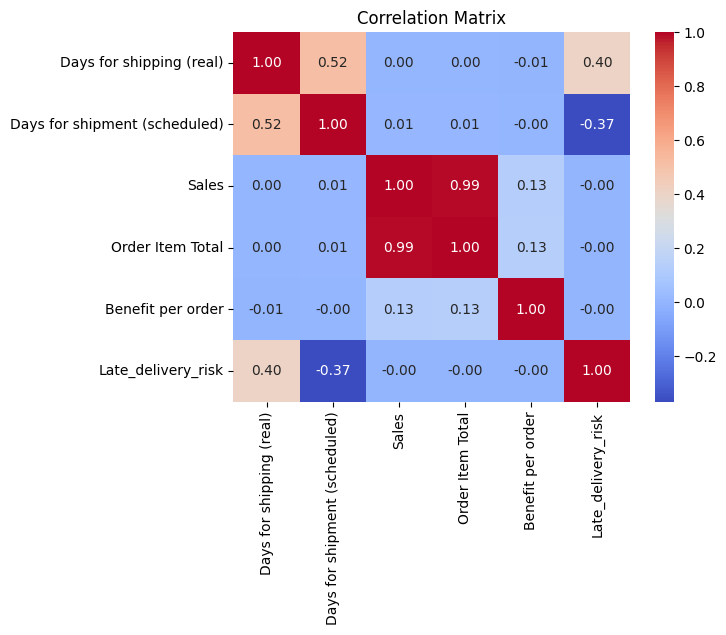

In [17]:
numerical_features = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                      'Sales', 'Order Item Total', 'Benefit per order']
correlation = data[numerical_features + ['Late_delivery_risk']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Analyze Market and Customer Segment

A. Markets with more customers

Market
Pacific Asia    13267
Europe          11657
LATAM            9325
USCA             6256
Africa           3311
Name: Customer Id, dtype: int64


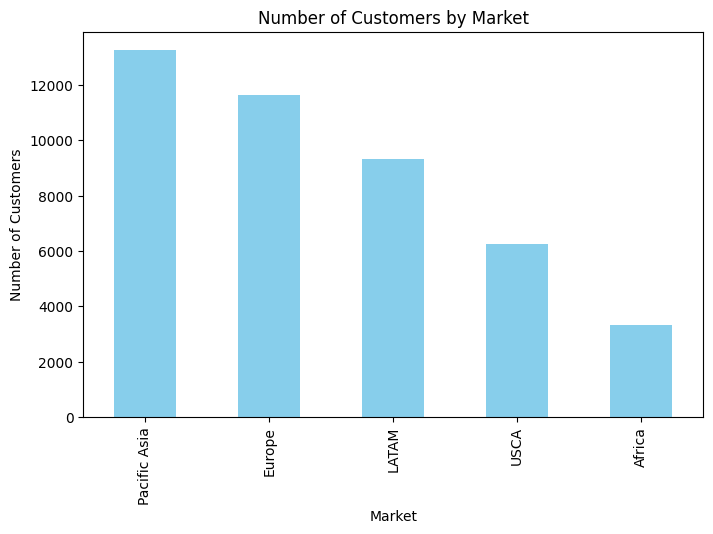

In [18]:
market_customers = data.groupby('Market')['Customer Id'].nunique().sort_values(ascending=False)
print(market_customers)
market_customers.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Number of Customers by Market')
plt.xlabel('Market')
plt.ylabel('Number of Customers')
plt.show()


Pacific Asia has the highest number of customers, exceeding 13,000. Europe has the second highest with 11,675 customers. LATAM follows with approximately 9,325 customers, and USCA has about 6,256. Africa has the fewest customers, with a little over 3,311.

B. Customer Segment Distribution

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64


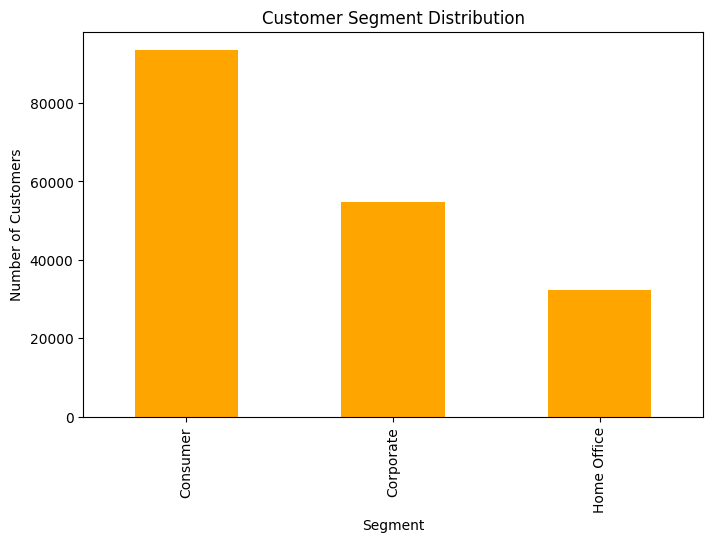

In [19]:
segment_distribution = data['Customer Segment'].value_counts()
print(segment_distribution)
segment_distribution.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


The "Consumer" segment has the largest number of customers, with 93,504.  Following that is the "Corporate" segment, which has around 54,789 customers. The "Home Office" segment has the fewest customers, at approximately 32,226. This suggests that the majority of customers for this business are individual consumers, followed by corporate clients, with home offices representing the smallest customer segment.

Shipping mode and transaction Type analysis

A. Most common shipping mode

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64


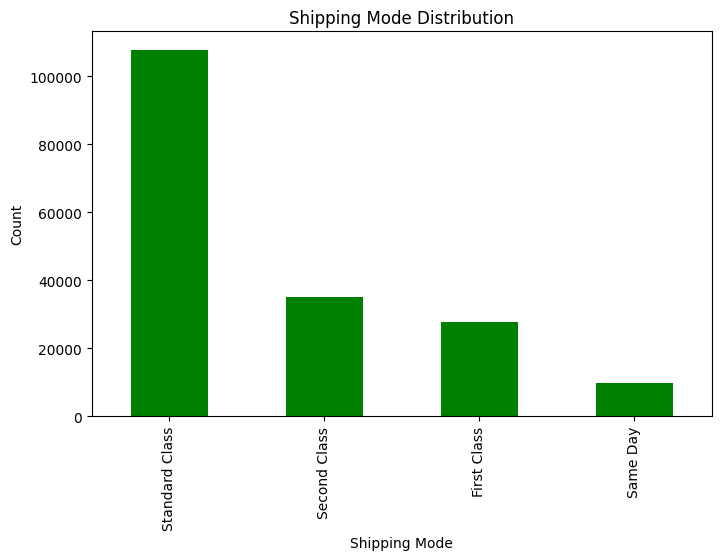

In [20]:
shipping_mode = data['Shipping Mode'].value_counts()
print(shipping_mode)
shipping_mode.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Shipping Mode Distribution')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()


"Standard Class" is the most frequently used shipping mode, with a count of 107,782. "Second Class" follows with around 35,216, and "First Class" has approximately 27,814. "Same Day" is the least used shipping mode, with a count of less than 9737. This indicates that most customers opt for the standard shipping option, while faster, presumably more expensive options like "Same Day" are less popular.

B. Most common transaction type

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64


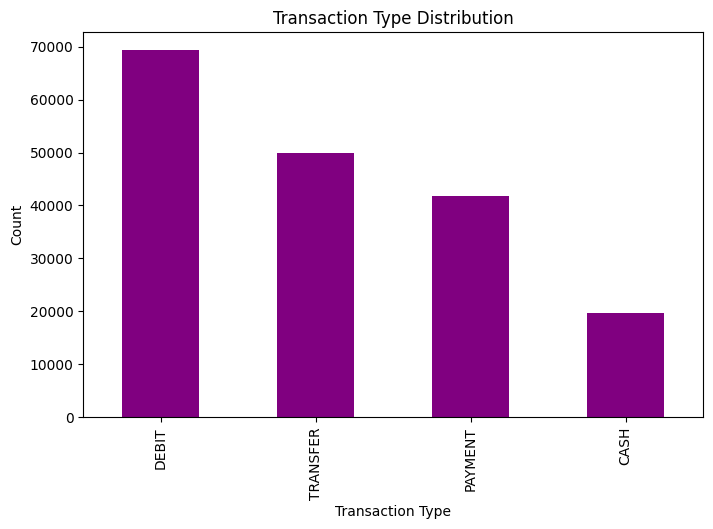

In [21]:
transaction_type = data['Type'].value_counts()
print(transaction_type)
transaction_type.plot(kind='bar', color='purple', figsize=(8, 5))
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


As we can see "DEBIT" is the most common type, with a count of nearly 69,295. "TRANSFER" follows with around 49,883 transactions. "PAYMENT" has a count of approximately 41,725, and "CASH" is the least frequent transaction type, with about 19,616. This suggests that debit transactions are the most preferred method of payment among customers, while cash is used less frequently.

3. Product department analysis

Department Name
Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: count, dtype: int64


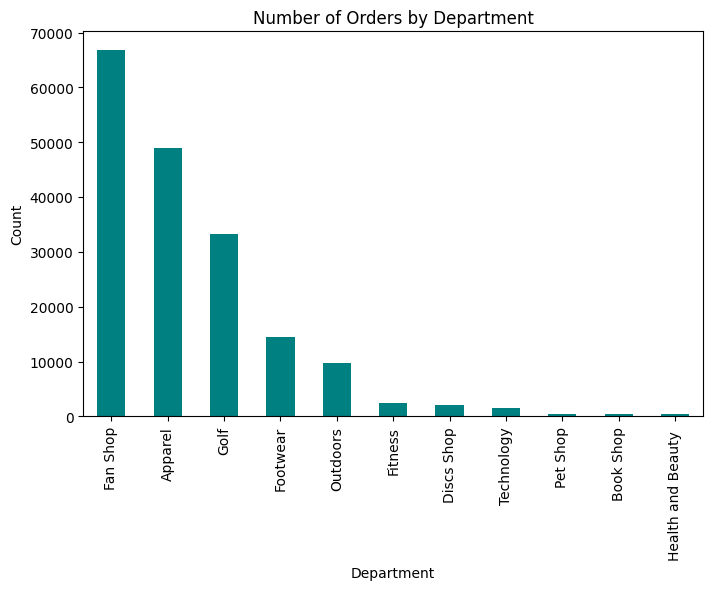

In [22]:
department_orders = data['Department Name'].value_counts()
print(department_orders)
department_orders.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Number of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


The department "Fan Shop" has the highest number of orders (66,861), followed by "Apparel" with 48,998 orders and "Golf" with 33,220. The remaining departments have significantly fewer orders, with "Footwear" at 14,525 and "Outdoors" at 9,686. "Fitness" (2,479), "Discs Shop" (2,026), "Technology" (1,465), "Pet Shop" (492), "Book Shop" (405), and "Health and Beauty" (362) all have less than 5,000 orders each. This data highlights that "Fan Shop", "Apparel", and "Golf" are the most popular departments in terms of order volume.

Late Delivery across categories

A. Late deliveries by market

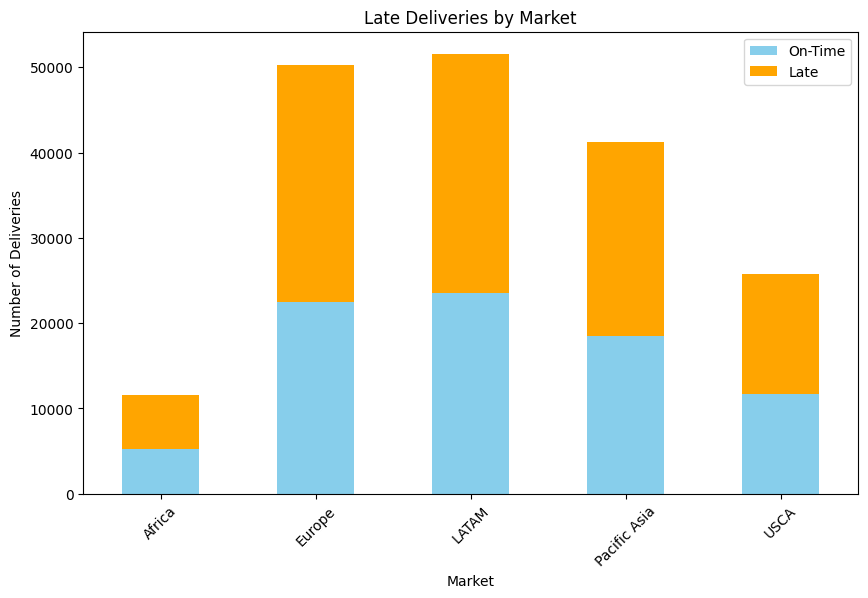

In [23]:
market_late = data.groupby(['Market', 'Late_delivery_risk']).size().unstack()
market_late.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Late Deliveries by Market')
plt.xlabel('Market')
plt.ylabel('Number of Deliveries')
plt.legend(['On-Time', 'Late'])
plt.xticks(rotation=45)
plt.show()


Each bar represents a market, with the blue portion showing on-time deliveries and the orange portion showing late deliveries.  LATAM has the highest total number of deliveries, with a significant portion being late. Europe and Pacific Asia also have a high volume of deliveries with a similar proportion of late deliveries.  USCA has a moderate number of total deliveries with the highest proportion of late deliveries, while Africa has the lowest number of deliveries overall with a relatively small number of late deliveries. This visualization helps to compare both the total delivery volume and the proportion of late deliveries across different markets.

B. Late deliveries by customer segment

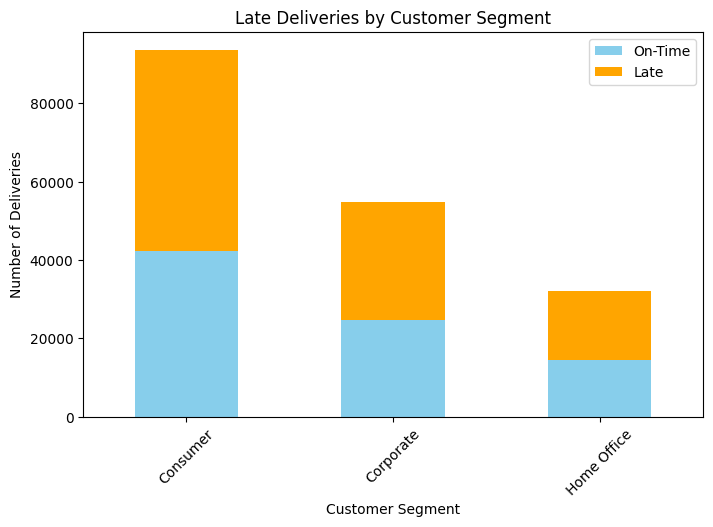

In [24]:
segment_late = data.groupby(['Customer Segment', 'Late_delivery_risk']).size().unstack()
segment_late.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Late Deliveries by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Deliveries')
plt.legend(['On-Time', 'Late'])
plt.xticks(rotation=45)
plt.show()


The "Consumer" segment has the highest number of deliveries overall, with a large portion of those being late. The "Corporate" segment has a moderate number of deliveries with a smaller proportion of late deliveries compared to "Consumer".  The "Home Office" segment has the lowest number of deliveries with a relatively small number of late deliveries. This visualization allows for a comparison of delivery performance and volume across different customer segments.

5. Days for shipping analysis

A. Scheduled vs Actual shipping days

C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_22072\1828122678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Late_delivery_risk', y='Days for shipping (real)', palette='Set2')


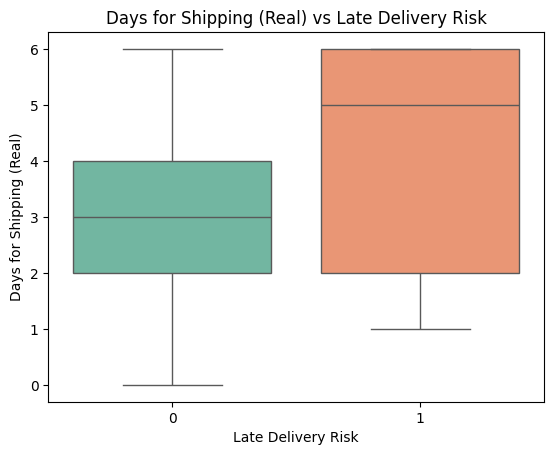

C:\Users\KUNAL SHEDGE\AppData\Local\Temp\ipykernel_22072\1828122678.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Late_delivery_risk', y='Days for shipment (scheduled)', palette='Set2')


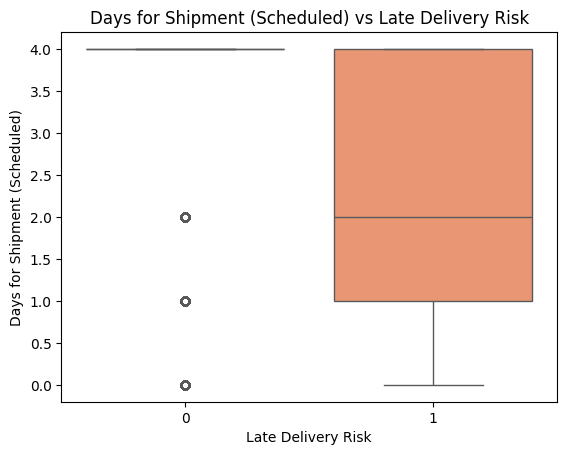

In [25]:
import seaborn as sns

sns.boxplot(data=data, x='Late_delivery_risk', y='Days for shipping (real)', palette='Set2')
plt.title('Days for Shipping (Real) vs Late Delivery Risk')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Days for Shipping (Real)')
plt.show()

sns.boxplot(data=data, x='Late_delivery_risk', y='Days for shipment (scheduled)', palette='Set2')
plt.title('Days for Shipment (Scheduled) vs Late Delivery Risk')
plt.xlabel('Late Delivery Risk')
plt.ylabel('Days for Shipment (Scheduled)')
plt.show()


B. Late deliveries by scheduled shipping days

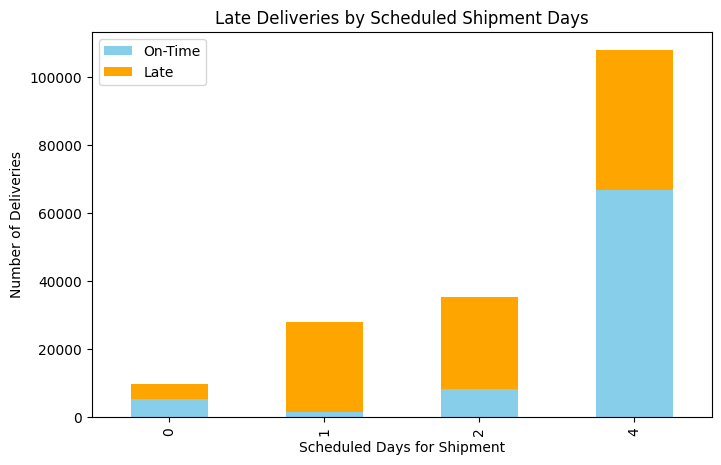

In [26]:
scheduled_days_late = data.groupby(['Days for shipment (scheduled)', 'Late_delivery_risk']).size().unstack()
scheduled_days_late.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Late Deliveries by Scheduled Shipment Days')
plt.xlabel('Scheduled Days for Shipment')
plt.ylabel('Number of Deliveries')
plt.legend(['On-Time', 'Late'])
plt.show()


 It appears that as the scheduled shipment time increases, the proportion of late deliveries also increases.  For shipments scheduled to take 0 days, there are relatively few late deliveries compared to on-time deliveries. However, for shipments scheduled to take 4 days, the number of late deliveries significantly outweighs the number of on-time deliveries. This suggests a strong correlation between longer scheduled shipping times and a higher risk of late delivery.

Sales Analysis


A. Sales by Market

Market
Europe          1.087240e+07
LATAM           1.027761e+07
Pacific Asia    8.273744e+06
USCA            5.066529e+06
Africa          2.294453e+06
Name: Sales, dtype: float64


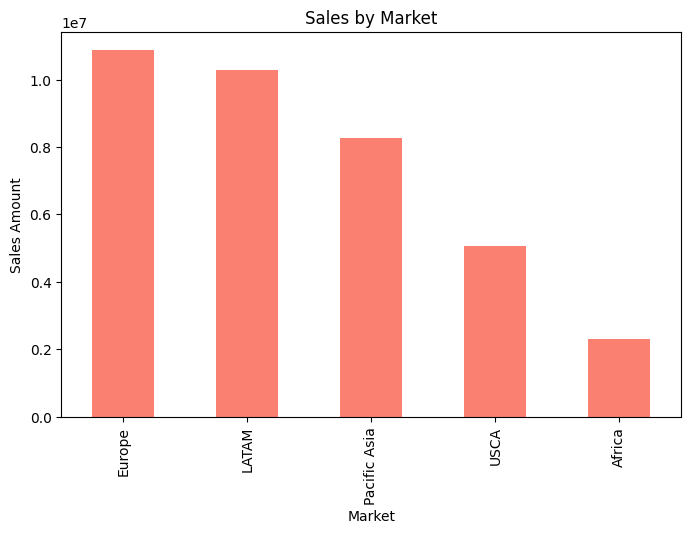

In [27]:
sales_market = data.groupby('Market')['Sales'].sum().sort_values(ascending=False)
print(sales_market)
sales_market.plot(kind='bar', color='salmon', figsize=(8, 5))
plt.title('Sales by Market')
plt.xlabel('Market')
plt.ylabel('Sales Amount')
plt.show()


 Europe has the highest sales, exceeding 10 million. LATAM follows closely with sales around 10 million as well. Pacific Asia has the third-highest sales, slightly over 8 million. USCA has sales around 5 million, and Africa has the lowest sales, approximately 2.5 million. This indicates that Europe and LATAM are the largest markets in terms of sales revenue.

B. Sales by Transaction type

Market
Europe          1.087240e+07
LATAM           1.027761e+07
Pacific Asia    8.273744e+06
USCA            5.066529e+06
Africa          2.294453e+06
Name: Sales, dtype: float64


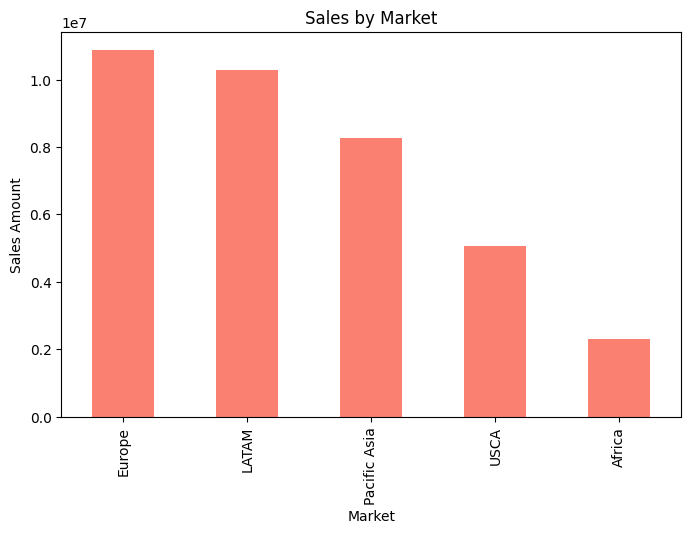

In [28]:
sales_market = data.groupby('Market')['Sales'].sum().sort_values(ascending=False)
print(sales_market)
sales_market.plot(kind='bar', color='salmon', figsize=(8, 5))
plt.title('Sales by Market')
plt.xlabel('Market')
plt.ylabel('Sales Amount')
plt.show()


Europe has the highest sales, exceeding 10 million. LATAM follows closely with sales around 10 million as well. Pacific Asia has the third-highest sales, slightly over 8 million. USCA has sales around 5 million, and Africa has the lowest sales, approximately 2.5 million. This indicates that Europe and LATAM are the largest markets in terms of sales revenue.

Combining Key features

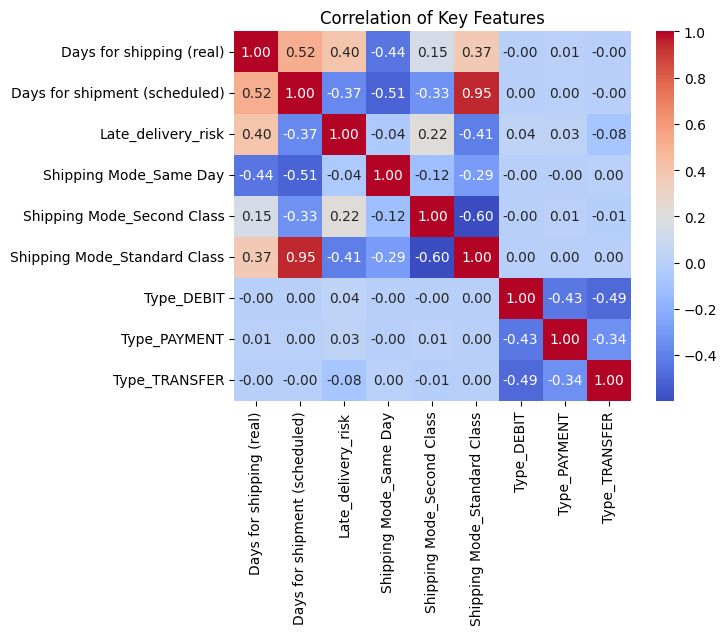

In [29]:
selected_features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Shipping Mode', 'Type', 'Late_delivery_risk']
correlation = pd.get_dummies(data[selected_features], drop_first=True).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Key Features')
plt.show()
